In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Projects 13_Caffeine Contents Of Drinks Analytical Dashboard By Alfin Bahru Rahmika Umar\caffeine.csv")
df

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


In [3]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (610, 5)


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


,Volume (ml),Calories,Caffeine (mg)
count,610.000000,610.000000,610.000000
mean,346.543630,75.527869,134.693443
std,143.747738,94.799919,155.362861
min,7.393375,0.000000,0.000000
25%,236.588000,0.000000,50.000000
50%,354.882000,25.000000,100.000000
75%,473.176000,140.000000,160.000000
max,1419.528000,830.000000,1555.000000


In [6]:
# 2. Deteksi data duplikat dan missing values
print("\nJumlah duplikat:", df.duplicated().sum())
print("Jumlah missing values:\n", df.isnull().sum())


Jumlah duplikat: 0
Jumlah missing values:
 drink            0
Volume (ml)      0
Calories         0
Caffeine (mg)    0
type             0
dtype: int64


In [7]:
# 3. Deteksi outliers untuk kolom numerik menggunakan IQR
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

outlier_volume = detect_outliers(df, 'Volume (ml)')
outlier_calories = detect_outliers(df, 'Calories')
outlier_caffeine = detect_outliers(df, 'Caffeine (mg)')

print("\nJumlah outlier Volume (ml):", len(outlier_volume))
print("Jumlah outlier Calories:", len(outlier_calories))
print("Jumlah outlier Caffeine (mg):", len(outlier_caffeine))


Jumlah outlier Volume (ml): 2
Jumlah outlier Calories: 8
Jumlah outlier Caffeine (mg): 21


In [8]:
# Menyimpan data awal untuk perbandingan
df_before = df.copy()

In [9]:
# 4. Data Cleaning:
# - Hapus duplikat
df_cleaned = df.drop_duplicates()

# - Hapus missing values (jika ada)
df_cleaned = df_cleaned.dropna()

# - Hapus outliers untuk tiap kolom numerik
for col in ['Volume (ml)', 'Calories', 'Caffeine (mg)']:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print("\nData setelah cleaning:")
print(df_cleaned.info())


Data setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 580 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          580 non-null    object 
 1   Volume (ml)    580 non-null    float64
 2   Calories       580 non-null    int64  
 3   Caffeine (mg)  580 non-null    int64  
 4   type           580 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 27.2+ KB
None


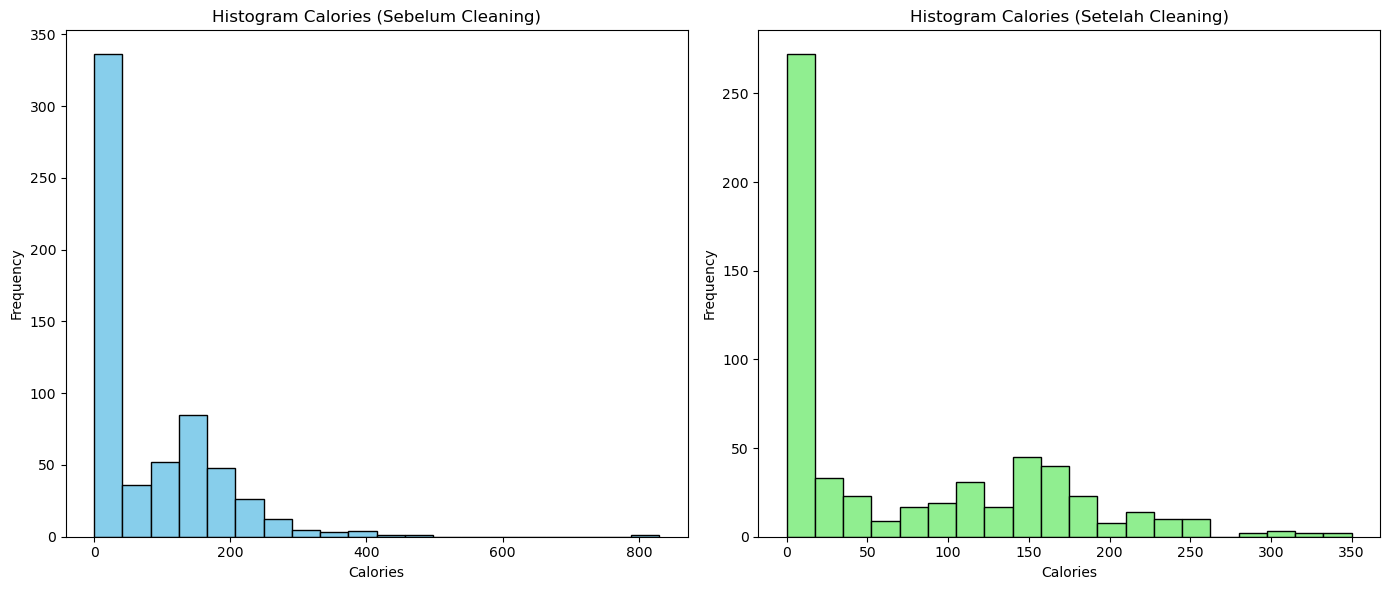

In [10]:
# 5. Visualisasi perbandingan data sebelum dan sesudah cleaning

# Membuat histogram untuk kolom 'Calories' sebagai contoh
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.hist(df_before['Calories'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram Calories (Sebelum Cleaning)')
plt.xlabel('Calories')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_cleaned['Calories'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram Calories (Setelah Cleaning)')
plt.xlabel('Calories')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

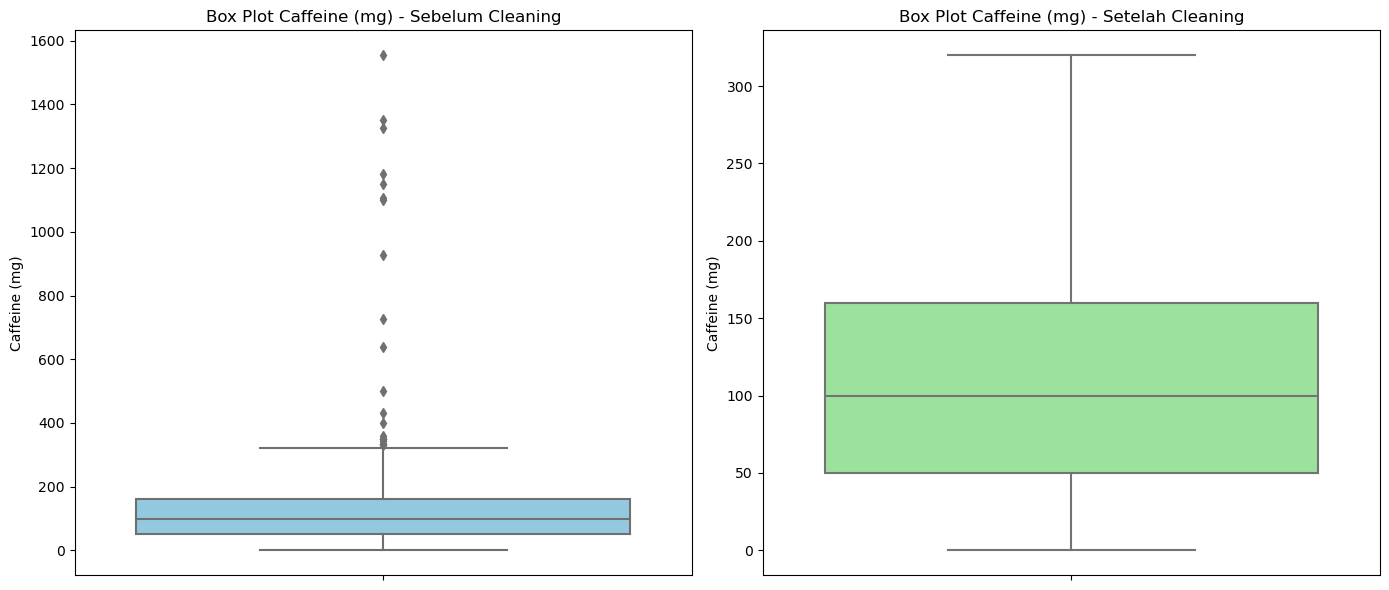

In [11]:
# Membuat box plot untuk kolom 'Caffeine (mg)'
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_before['Caffeine (mg)'], color='skyblue')
plt.title('Box Plot Caffeine (mg) - Sebelum Cleaning')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Caffeine (mg)'], color='lightgreen')
plt.title('Box Plot Caffeine (mg) - Setelah Cleaning')

plt.tight_layout()
plt.show()

In [12]:
# 6. Menyimpan dataset yang telah dibersihkan
df_cleaned.to_csv('caffeine-cleaned.csv', index=False)

In [13]:
# Menghitung metrik
total_beverages = df_cleaned['drink'].nunique()
types_of_beverages = df_cleaned['type'].unique()

# Tambahkan kolom baru untuk rasio
df_cleaned['Caffeine per Volume'] = df_cleaned['Caffeine (mg)'] / df_cleaned['Volume (ml)']
df_cleaned['Calories per Volume'] = df_cleaned['Calories'] / df_cleaned['Volume (ml)']

highest_caffeine_volume = df_cleaned.loc[df_cleaned['Caffeine per Volume'].idxmax()]
highest_calories_volume = df_cleaned.loc[df_cleaned['Calories per Volume'].idxmax()]

print("Total Beverage Names:", total_beverages)
print("Type Of Beverages:", types_of_beverages)
print("\nDrink dengan Highest Caffeine/Volume:")
print(highest_caffeine_volume[['drink', 'Caffeine per Volume']])
print("\nDrink dengan Highest Calories/Volume:")
print(highest_calories_volume[['drink', 'Calories per Volume']])

Total Beverage Names: 580
Type Of Beverages: ['Coffee' 'Energy Drinks' 'Energy Shots' 'Soft Drinks' 'Tea' 'Water']

Drink dengan Highest Caffeine/Volume:
drink                  Vital 4U Liquid Energy
Caffeine per Volume                 10.482358
Name: 406, dtype: object

Drink dengan Highest Calories/Volume:
drink                  Clif Shot Energy Gel
Calories per Volume                2.817838
Name: 404, dtype: object


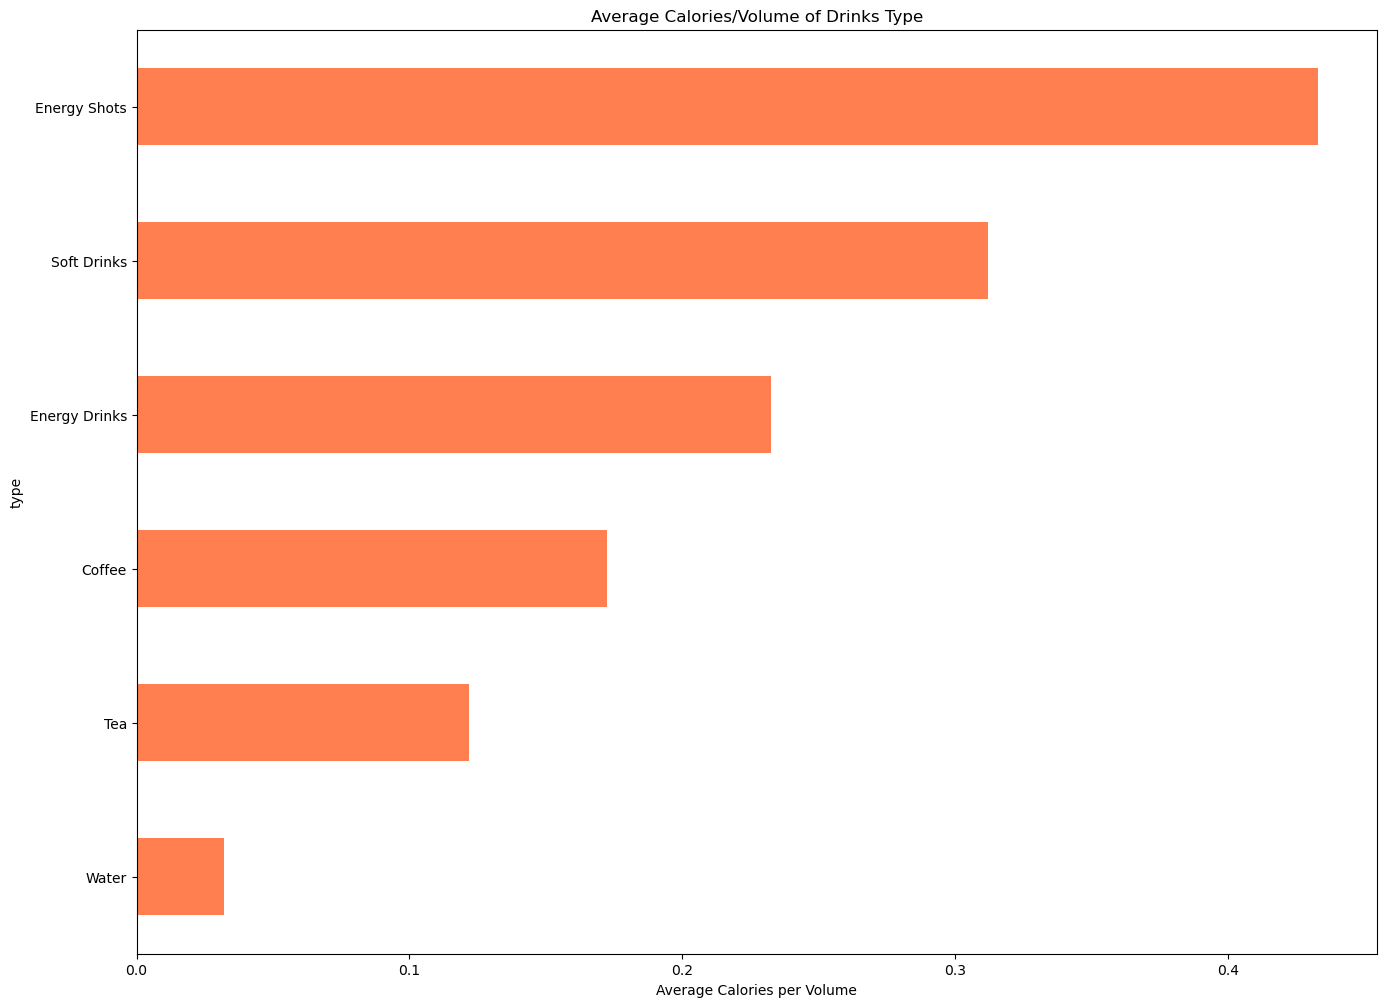

In [22]:
# Grafik Horizontal Bar Chart (Average Calories/Volume of Drinks Type)
# Menghitung rata-rata kalori per volume berdasarkan jenis minuman
avg_calories_per_volume = df_cleaned.groupby('type')['Calories per Volume'].mean().sort_values()

# Membuat grafik horizontal bar chart
plt.figure(figsize=(16,12))
ax = avg_calories_per_volume.plot(kind='barh', color='coral')
plt.xlabel('Average Calories per Volume')
plt.title('Average Calories/Volume of Drinks Type')
plt.show()

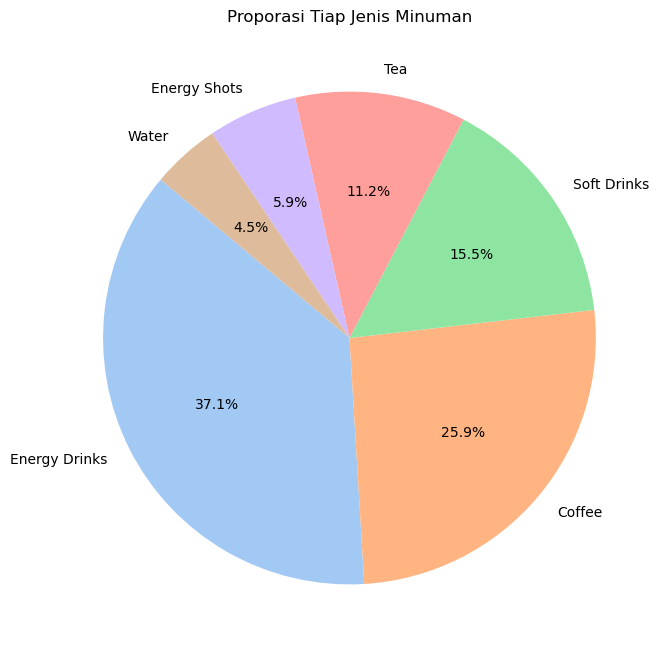

In [15]:
# Grafik Pie Chart (Total Each Type Of Beverages)
beverages_count = df_cleaned['type'].value_counts()
plt.figure(figsize=(8,8))
beverages_count.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.title('Proporasi Tiap Jenis Minuman')
plt.show()

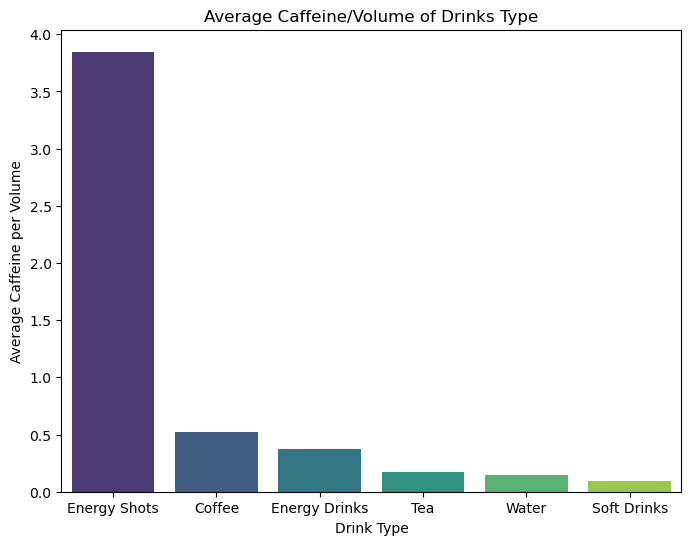

In [16]:
# Grafik Bar Chart (Average Caffeine/Volume Of Drinks Type)
avg_caffeine_per_volume = df_cleaned.groupby('type')['Caffeine per Volume'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=avg_caffeine_per_volume.index, y=avg_caffeine_per_volume.values, palette='viridis')
plt.xlabel('Drink Type')
plt.ylabel('Average Caffeine per Volume')
plt.title('Average Caffeine/Volume of Drinks Type')
plt.show()

In [17]:
# fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# # Horizontal Bar Chart (Average Calories/Volume)
# axs[0, 0].barh(avg_calories_per_volume.index, avg_calories_per_volume.values, color='coral')
# axs[0, 0].set_xlabel('Average Calories per Volume')
# axs[0, 0].set_title('Average Calories/Volume of Drinks Type')

# # Pie Chart (Total Each Type Of Beverages)
# axs[0, 1].pie(beverages_count.values, labels=beverages_count.index, autopct='%1.1f%%',
#               colors=sns.color_palette('pastel'), startangle=140)
# axs[0, 1].set_title('Proporasi Tiap Jenis Minuman')

# # Bar Chart (Average Caffeine/Volume)
# sns.barplot(x=avg_caffeine_per_volume.index, y=avg_caffeine_per_volume.values,
#             palette='viridis', ax=axs[1, 0])
# axs[1, 0].set_xlabel('Drink Type')
# axs[1, 0].set_ylabel('Average Caffeine per Volume')
# axs[1, 0].set_title('Average Caffeine/Volume of Drinks Type')

# # Tampilkan metrik utama sebagai text di subplot ke-4
# axs[1, 1].axis('off')
# textstr = f"""Total Beverage Names: {total_beverages}
# Type Of Beverages: {', '.join(types_of_beverages)}
# Highest Caffeine/Volume: {highest_caffeine_volume['drink']} ({highest_caffeine_volume['Caffeine per Volume']:.2f})
# Highest Calories/Volume: {highest_calories_volume['drink']} ({highest_calories_volume['Calories per Volume']:.2f})"""
# axs[1, 1].text(0.1, 0.5, textstr, fontsize=12, verticalalignment='center')

# plt.tight_layout()
# plt.show()
